In [1]:
import torch 
from torch import nn

from torch.utils import data

import numpy as np

from datageneration import DataGenerator
from helpers import Helper
from experiment import Experiment


from networks import Encoder, Decoder

import json


In [2]:
BASE_DIR = 'checkpoints'
FILE_NAME = '4172020_1_d_weights.pth'
WEIGHT_PATH = BASE_DIR + '/' + FILE_NAME

with open('config.json') as f:
    file = f.read()
    conf = json.loads(file)

In [3]:
BASE_DIR = 'checkpoints'

with open('configs/config.json') as f:
    file = f.read()
    conf = json.loads(file)

In [4]:
datagenerator = DataGenerator(**conf['default']['data_gen_params'])
x_values, func_x = datagenerator.generate_curves()
func_x = Helper.list_np_to_sensor(func_x)
x_values = x_values.repeat(func_x.shape[0], 1, 1)

test_len = int(x_values.shape[0] * conf['default']['test_params']['test_share'])
testdata = data.TensorDataset(x_values[:test_len], func_x[:test_len])
testloader = data.DataLoader(testdata, batch_size=15)

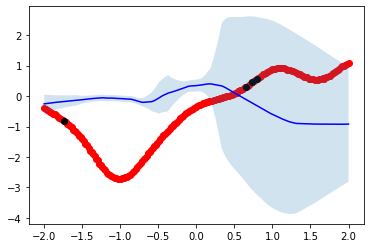

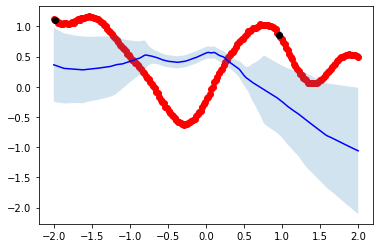

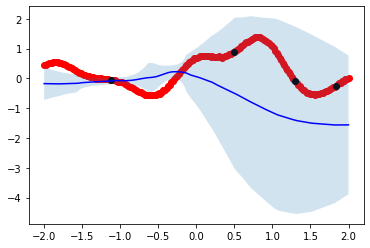

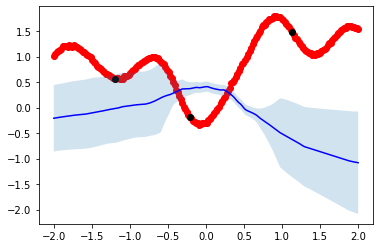

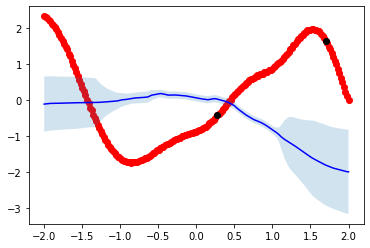

1.6237238883972167

In [10]:
experiment = Experiment(**conf['default']['experiment_params'])
experiment.run_test(WEIGHT_PATH, testloader)

In [11]:
a = torch.Tensor([[1,2],[3,4]])

In [14]:
a[1,0]=5

In [15]:
a

tensor([[1., 2.],
        [5., 4.]])